In [1]:
conda install -c conda-forge geopy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import folium 
from geopy.geocoders import Nominatim 
%matplotlib inline

In [61]:
def geo_location(address):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [62]:
CLIENT_ID ='5C0UK3L4Z1EBQVG0OLGWER0NUZCHSJLMMWNVR2N2CVWW2KQG' 
CLIENT_SECRET ='ZQG5QIIGL1OM25SE0UQLNG1KCGUJJ3MVQ3MJYSWSCRDZFAEW' 
VERSION = '20200324' 

In [63]:
def get_venues(lat,lng):
    
    radius=400
    LIMIT=1000
    
   
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [6]:
def get_venue_details(venue_id):
        
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [64]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    
    features=resp['features']
    
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
   
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [65]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [66]:
ny_data.shape

(306, 4)

In [67]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
cuban_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    cuban_resturants=venues[venues['Category']=='Cuban Restaurant']   
    print('(',count,'/',len(ny_data),')','Cuban Resturants in '+Neighborhood+', '+Borough+':'+str(len(cuban_resturants)))
    print(row)
    for resturant_detail in cuban_resturants.values.tolist():
        id, name , category=resturant_detail
        cuban_rest_ny = cuban_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Cuban Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Cuban Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Cuban Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Cuban Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Cuban Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Cuban Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Cuban Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Cuban Resturants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Cuban Resturants in Norwood, Bronx:0
['Bronx', 'Norwood', 40.87722

( 69 / 306 ) Cuban Resturants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Cuban Resturants in Fort Greene, Brooklyn:1
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Cuban Resturants in Park Slope, Brooklyn:0
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Cuban Resturants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Cuban Resturants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Cuban Resturants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758905230874, -73.87936970045875]
( 75 / 306 ) Cuban Resturants in Canarsie, Brooklyn:0
['Brooklyn', 'Canarsie', 40.63556432797428, -73.90209269778966]
( 76 / 306 ) Cuban Resturants in Flatlands, Brooklyn:0
['Brooklyn', 'Flatlands', 40.630446043757466, -73.92911302644674]
( 77 / 306 ) 

( 134 / 306 ) Cuban Resturants in Howard Beach, Queens:0
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Cuban Resturants in Corona, Queens:0
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Cuban Resturants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Cuban Resturants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Cuban Resturants in Richmond Hill, Queens:0
['Queens', 'Richmond Hill', 40.69794731471763, -73.83183321446887]
( 139 / 306 ) Cuban Resturants in Flushing, Queens:0
['Queens', 'Flushing', 40.76445419697846, -73.83177300329582]
( 140 / 306 ) Cuban Resturants in Long Island City, Queens:0
['Queens', 'Long Island City', 40.75021734610528, -73.93920223915505]
( 141 / 306 ) Cuban Resturants in Sunnyside, Queens:0
['Queens', 'Sunnyside', 40.74017628351924, -73.92691617561577]
( 142 / 306 ) Cuban Resturants in Ea

( 202 / 306 ) Cuban Resturants in West Brighton, Staten Island:0
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Cuban Resturants in Grymes Hill, Staten Island:0
['Staten Island', 'Grymes Hill', 40.624184791313006, -74.08724819983729]
( 204 / 306 ) Cuban Resturants in Todt Hill, Staten Island:0
['Staten Island', 'Todt Hill', 40.59706851814673, -74.1113288180088]
( 205 / 306 ) Cuban Resturants in South Beach, Staten Island:0
['Staten Island', 'South Beach', 40.58024741350956, -74.0795529253982]
( 206 / 306 ) Cuban Resturants in Port Richmond, Staten Island:0
['Staten Island', 'Port Richmond', 40.63366930554365, -74.12943426797008]
( 207 / 306 ) Cuban Resturants in Mariner's Harbor, Staten Island:0
['Staten Island', "Mariner's Harbor", 40.632546390481124, -74.15008537046981]
( 208 / 306 ) Cuban Resturants in Port Ivory, Staten Island:0
['Staten Island', 'Port Ivory', 40.63968297845542, -74.17464532993542]
( 209 / 306 ) Cuban Resturants in Castleton 

( 264 / 306 ) Cuban Resturants in Jamaica Hills, Queens:0
['Queens', 'Jamaica Hills', 40.71145964370482, -73.79646462081593]
( 265 / 306 ) Cuban Resturants in Utopia, Queens:0
['Queens', 'Utopia', 40.73350025429757, -73.79671678028349]
( 266 / 306 ) Cuban Resturants in Pomonok, Queens:0
['Queens', 'Pomonok', 40.73493618075478, -73.80486120040537]
( 267 / 306 ) Cuban Resturants in Astoria Heights, Queens:0
['Queens', 'Astoria Heights', 40.7703173929982, -73.89467996270574]
( 268 / 306 ) Cuban Resturants in Claremont Village, Bronx:0
['Bronx', 'Claremont Village', 40.83142834161548, -73.90119903387667]
( 269 / 306 ) Cuban Resturants in Concourse Village, Bronx:0
['Bronx', 'Concourse Village', 40.824780490842905, -73.91584652759009]
( 270 / 306 ) Cuban Resturants in Mount Eden, Bronx:0
['Bronx', 'Mount Eden', 40.84382617671654, -73.91655551964419]
( 271 / 306 ) Cuban Resturants in Mount Hope, Bronx:0
['Bronx', 'Mount Hope', 40.84884160724665, -73.90829930881988]
( 272 / 306 ) Cuban Restur

In [68]:
cuban_rest_ny.to_csv('cuban_rest_ny_tocsv1.csv')

In [69]:
cuban_rest_ny = pd.read_csv('cuban_rest_ny_tocsv1.csv')
cuban_rest_ny.drop(columns =['Unnamed: 0'], inplace =True)
cuban_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Brooklyn,Bushwick,5b392628336273003994f438,Millie’s Cuban Cafe
1,Brooklyn,Carroll Gardens,55d8f517498e3658c1387428,Cubana Cafe
2,Brooklyn,Fort Greene,42d1b680f964a5200b261fe3,Habana Outpost
3,Brooklyn,Downtown,50478b43e4b05a8c89d8198c,Sophies Cuban Cuisine
4,Brooklyn,City Line,4d978a6c61a3a1cde451b842,El Castillo De Jagua


In [70]:
cuban_rest_ny.shape

(15, 4)

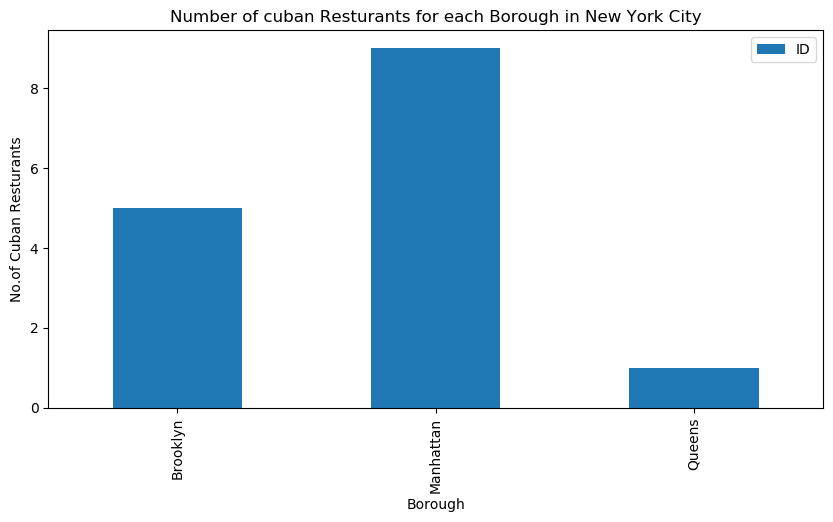

In [71]:
plt.figure(figsize=(10,5), dpi = 100)

plt.title('Number of cuban Resturants for each Borough in New York City')

plt.xlabel('Borough', fontsize = 10)

plt.ylabel('No.of Cuban Resturants', fontsize=10)

cuban_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')

plt.legend()

plt.show()

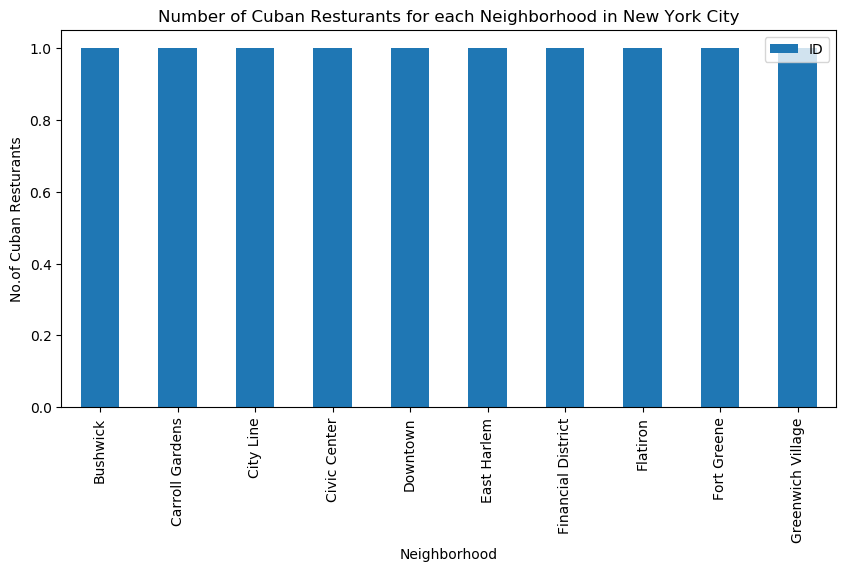

In [72]:
plt.figure(figsize=(10,5), dpi = 100)

plt.title('Number of Cuban Resturants for each Neighborhood in New York City')

plt.xlabel('Neighborhood', fontsize = 10)

plt.ylabel('No.of Cuban Resturants', fontsize=10)

cuban_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar')

plt.legend()

plt.show()

In [16]:
cuban_rest_ny[cuban_rest_ny['Neighborhood']=='Bushwick']

,Borough,Neighborhood,ID,Name
0,Brooklyn,Bushwick,5b392628336273003994f438,Millie’s Cuban Cafe


In [73]:
cuban_rest_ny[cuban_rest_ny['Neighborhood']=='Downtown']

,Borough,Neighborhood,ID,Name
3,Brooklyn,Downtown,50478b43e4b05a8c89d8198c,Sophies Cuban Cuisine


In [74]:
cuban_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in cuban_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(cuban_rest_ny),')','processed')
    cuban_rest_stats_ny = cuban_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                 Name  Likes  Rating  Tips
0  5b392628336273003994f438  Millie’s Cuban Cafe     17     8.2    10
( 1 / 15 ) processed
                         ID         Name  Likes  Rating  Tips
0  55d8f517498e3658c1387428  Cubana Cafe     70     7.6    17
( 2 / 15 ) processed
                         ID            Name  Likes  Rating  Tips
0  42d1b680f964a5200b261fe3  Habana Outpost    779     8.5   249
( 3 / 15 ) processed
                         ID                   Name  Likes  Rating  Tips
0  50478b43e4b05a8c89d8198c  Sophies Cuban Cuisine     97     8.4    27
( 4 / 15 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4d978a6c61a3a1cde451b842  El Castillo De Jagua      3     6.5     2
( 5 / 15 ) processed
                         ID                Name  Likes  Rating  Tips
0  50cd10ffe4b0981e0a1a1c9e  Harlem's Floridita     59     6.7    39
( 6 / 15 ) processed
                         ID         Name  Likes  Rating 

In [75]:
cuban_rest_stats_ny.tail()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
10,Manhattan,Greenwich Village,425f0400f964a52007211fe3,Cuba,427.0,8.5,169.0
11,Manhattan,Financial District,4a82f013f964a52096f91fe3,Sophie's Cuban Cuisine,117.0,8.1,59.0
12,Manhattan,Civic Center,4b311e89f964a520890025e3,Sophie's Cuban Cuisine,112.0,8.3,60.0
13,Queens,Hunters Point,4bddab2effdec928edece5a1,Madera Cuban Grill & Steakhouse,82.0,8.2,63.0
14,Manhattan,Flatiron,4ad64e3ff964a520700621e3,Sophie's Cuban Cuisine,201.0,8.5,82.0


In [76]:
cuban_rest_stats_ny.to_csv('cuban_rest_stats_ny_csv.csv')

In [77]:
cuban_rest_stats_ny.shape

(15, 7)

In [78]:
cuban_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       15 non-null     object 
 1   Neighborhood  15 non-null     object 
 2   ID            15 non-null     object 
 3   Name          15 non-null     object 
 4   Likes         15 non-null     float64
 5   Rating        15 non-null     float64
 6   Tips          15 non-null     float64
dtypes: float64(3), object(4)
memory usage: 968.0+ bytes


In [79]:
cuban_rest_stats_ny['Likes']=cuban_rest_stats_ny['Likes'].astype('float64')
cuban_rest_stats_ny['Tips']=cuban_rest_stats_ny['Tips'].astype('float64')
cuban_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       15 non-null     object 
 1   Neighborhood  15 non-null     object 
 2   ID            15 non-null     object 
 3   Name          15 non-null     object 
 4   Likes         15 non-null     float64
 5   Rating        15 non-null     float64
 6   Tips          15 non-null     float64
dtypes: float64(3), object(4)
memory usage: 968.0+ bytes


In [80]:
cuban_rest_stats_ny.describe()

,Likes,Rating,Tips
count,15.000000,15.000000,15.000000
mean,161.533333,8.020000,66.866667
std,198.389540,0.667832,65.967380
min,3.000000,6.500000,2.000000
25%,64.500000,7.850000,22.000000
50%,112.000000,8.200000,59.000000
75%,150.500000,8.450000,81.500000
max,779.000000,9.000000,249.000000


In [81]:
cuban_rest_stats_ny.iloc[cuban_rest_stats_ny['Likes'].idxmax()]

Borough                         Brooklyn
Neighborhood                 Fort Greene
ID              42d1b680f964a5200b261fe3
Name                      Habana Outpost
Likes                                779
Rating                               8.5
Tips                                 249
Name: 2, dtype: object

In [82]:
cuban_rest_stats_ny.iloc[cuban_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              4ce5648a5fce5481ba5e5baa
Name              Sophie's Cuban Cuisine
Likes                                184
Rating                                 9
Tips                                  81
Name: 8, dtype: object

In [83]:
cuban_rest_stats_ny.iloc[cuban_rest_stats_ny['Tips'].idxmax()]

Borough                         Brooklyn
Neighborhood                 Fort Greene
ID              42d1b680f964a5200b261fe3
Name                      Habana Outpost
Likes                                779
Rating                               8.5
Tips                                 249
Name: 2, dtype: object

In [84]:
ny_neighborhood_stats=cuban_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False)

,Neighborhood,Average Rating
13,Midtown,9.0
7,Flatiron,8.5
8,Fort Greene,8.5
9,Greenwich Village,8.5
4,Downtown,8.4
3,Civic Center,8.3
0,Bushwick,8.2
10,Hunters Point,8.2
6,Financial District,8.1
11,Lenox Hill,8.1


In [85]:
ny_borough_stats=cuban_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Queens,8.20
1,Manhattan,8.10
0,Brooklyn,7.84


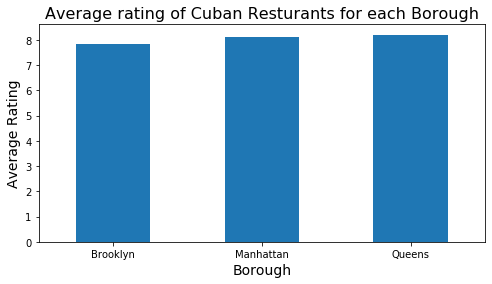

In [87]:
cuban_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(8,4))
plt.title('Average rating of Cuban Resturants for each Borough', fontsize=16)

plt.xlabel('Borough', fontsize = 14)

plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation = 'horizontal')
plt.show()

In [89]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.3]
ny_neighborhood_stats

,Neighborhood,Average Rating
3,Civic Center,8.3
4,Downtown,8.4
7,Flatiron,8.5
8,Fort Greene,8.5
9,Greenwich Village,8.5
13,Midtown,9.0


In [90]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Civic Center,40.715229,-74.005415,8.3
1,Brooklyn,Downtown,40.690844,-73.983463,8.4
2,Manhattan,Flatiron,40.739673,-73.990947,8.5
3,Brooklyn,Fort Greene,40.688527,-73.972906,8.5
4,Manhattan,Greenwich Village,40.726933,-73.999914,8.5
5,Manhattan,Midtown,40.754691,-73.981669,9.0


In [91]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

incidents = folium.map.FeatureGroup()

for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=8, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [44]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

In [93]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough Boundaries.geojson'
ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)
# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')

# Conclusion: 

Currently, there are not many cuban restaurants in new york city. However, Manhattan have good potential Cuban Resturant Market, and it is the best place to go if you want to try aome good Cuban market. 